# YOLOv3 training module

- Link to darknet repo- https://github.com/AlexeyAB/darknet 
- Face mask detection tutorial for reference- https://medium.com/analytics-vidhya/train-a-custom-yolov4-object-detector-using-google-colab-61a659d4868 
- My training folder (where weights and results are saved)- https://drive.google.com/drive/folders/1PlTEJNdRXb5jilJdKiB2_o2Kt2Yah2zR?usp=sharing
- Compiled list of useful resources for future reference- https://docs.google.com/document/d/1hCyvGjwNP2Xob-8LWJ67TRhOwcplh48ymKK0nxtIics/edit?usp=sharing

<b>Note:</b> You might want to consider this repo along with the official one: https://github.com/mdv3101/darknet-yolov3#how-to-train-to-detect-your-custom-objects 

In [1]:
#Mount the Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#create a symlink
!ln -s /content/gdrive/MyDrive/ /mydrive

#move to /mydrive/yolov4
%cd /mydrive/YOLOv3

/content/gdrive/MyDrive/YOLOv3


In [ ]:
#clone the darknet repo here
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15389, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 15389 (delta 0), reused 1 (delta 0), pack-reused 15387
Receiving objects: 100% (15389/15389), 13.99 MiB | 5.58 MiB/s, done.
Resolving deltas: 100% (10348/10348), done.
Checking out files: 100% (2050/2050), done.


In [3]:
#make changes in the makefile of darknet to enable opencv and gpu
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/MyDrive/YOLOv3/darknet


In [4]:
#run make command to build darknet
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
#unzip the data set into the data folder of darknet repo
!unzip /mydrive/YOLOv3/obj.zip -d data/

In [ ]:
#replace the old yolov4-custom file with the changes you made
!cp /mydrive/YOLOv3/yolov3-custom.cfg cfg

In [ ]:
#copy obj.names and obj.data folders to data/
!cp /mydrive/YOLOv3/obj.names data
!cp /mydrive/YOLOv3/obj.data data

In [ ]:
#copy processes.py to the darknet directory
!cp /mydrive/YOLOv3/process.py .

In [ ]:
#run processes.py to divide the data into test and train
!python process.py

/content/gdrive/My Drive/YOLOv3/darknet


In [ ]:
#downloaded the pre-trained weights on coco data-set for yolov4
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-01-08 19:50:37--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  31.5MB/s    in 5.1s    

2022-01-08 19:50:42 (30.5 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
#Train the custom-detector :) If it starts, enjoy
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.268528), count: 3, class_loss = 329.203003, iou_loss = 0.970856, total_loss = 330.173859 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.278325), count: 6, class_loss = 1061.923462, iou_loss = 6.100220, total_loss = 1068.023682 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.272869), count: 2, class_loss = 4079.623047, iou_loss = 1.720947, total_loss = 4081.343994 
 total_bbox = 342, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.472980), count: 7, class_loss = 330.455841, iou_loss = 1.364227, total_loss = 331.820068 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.217371), count: 1, class_loss = 1057.163818, iou_loss = 0.391968, total_loss = 1057.555786 
v3 (mse loss, Normalizer: (iou: 0.

In [6]:
#to continue training from where we left
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_last.weights -dont_show -map

^C


In [7]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [8]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=8/subdivisions=1/' yolov3-custom.cfg
%cd ..

/content/gdrive/My Drive/YOLOv3/darknet/cfg
/content/gdrive/My Drive/YOLOv3/darknet


In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_best.weights /mydrive/YOLOv3/test_images/83.jpg -thresh 0.3

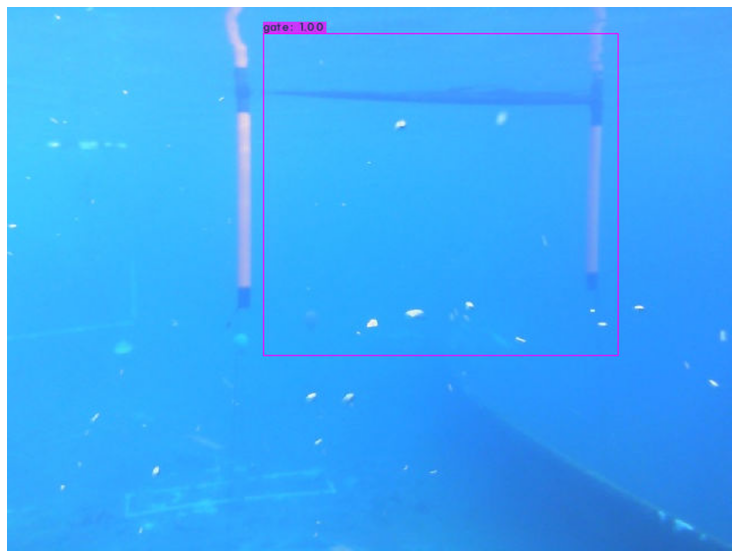

In [11]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_last.weights /mydrive/YOLOv3/test_images/86.jpg -thresh 0.3

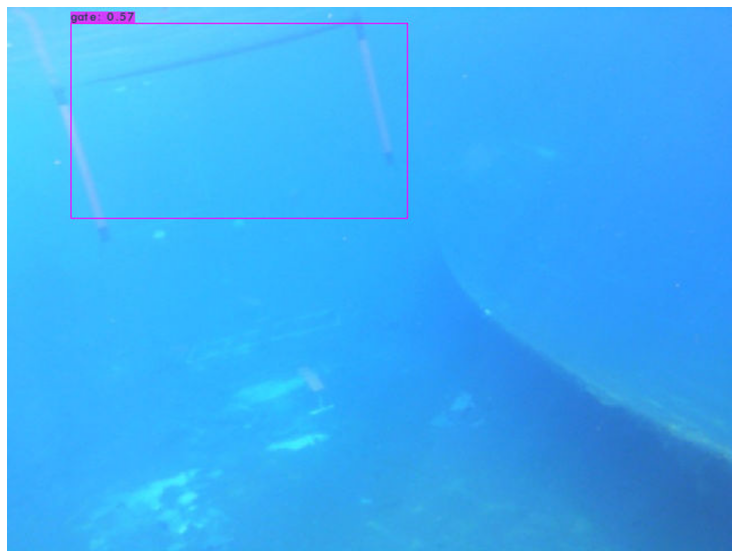

In [13]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_last.weights /mydrive/YOLOv3/test_images/91.jpg -thresh 0.3

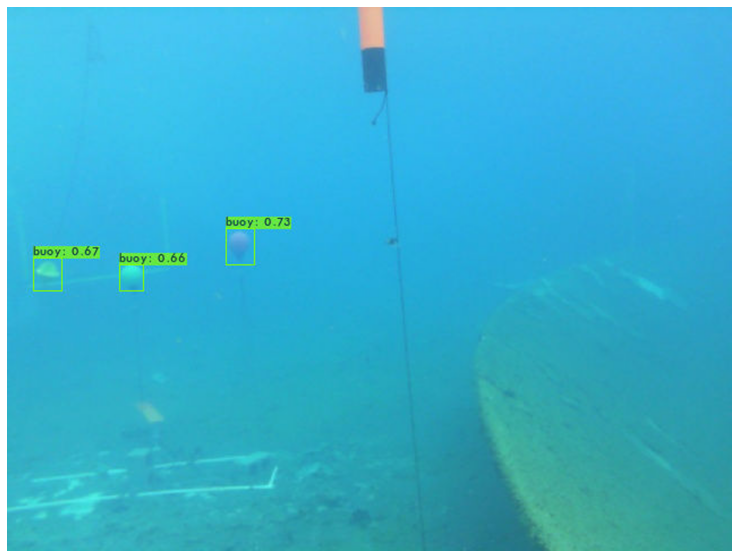

In [15]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_last.weights /mydrive/YOLOv3/test_images/94.jpg -thresh 0.3

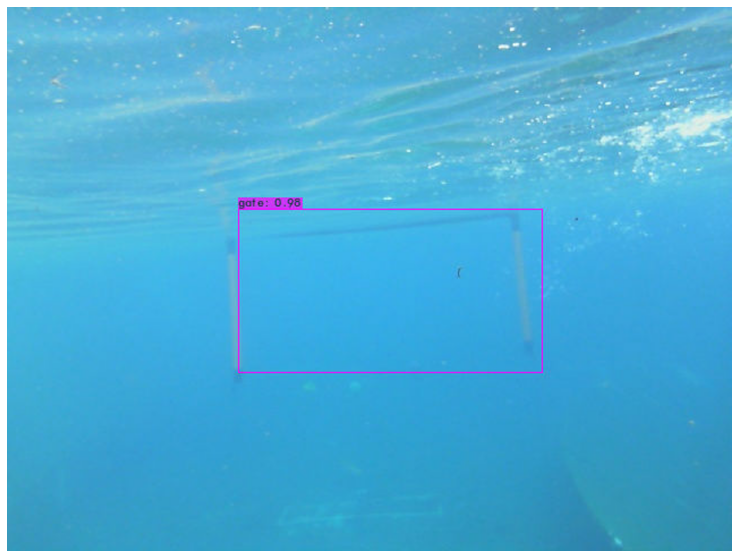

In [17]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_last.weights /mydrive/YOLOv3/test_images/100.jpg -thresh 0.3

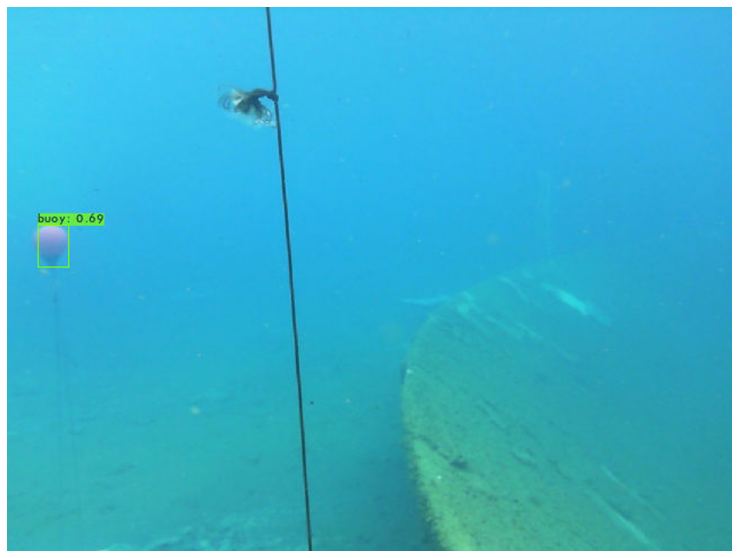

In [19]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_last.weights /mydrive/YOLOv3/test_images/102.jpg -thresh 0.3

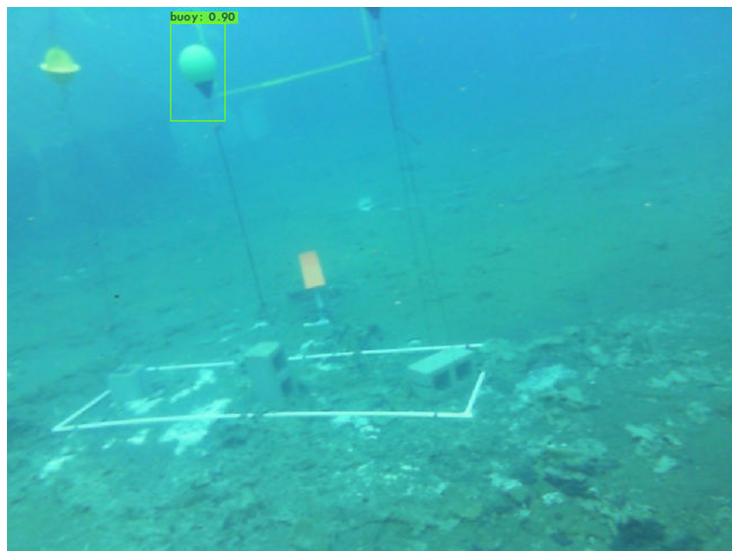

In [21]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_last.weights /mydrive/YOLOv3/test_images/104.jpg

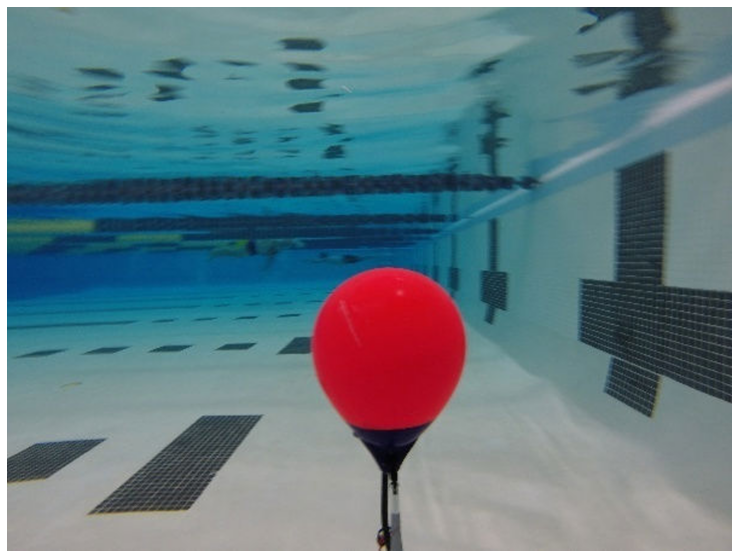

In [23]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_last.weights /mydrive/YOLOv3/test_images/122.jpg -thresh 0.3

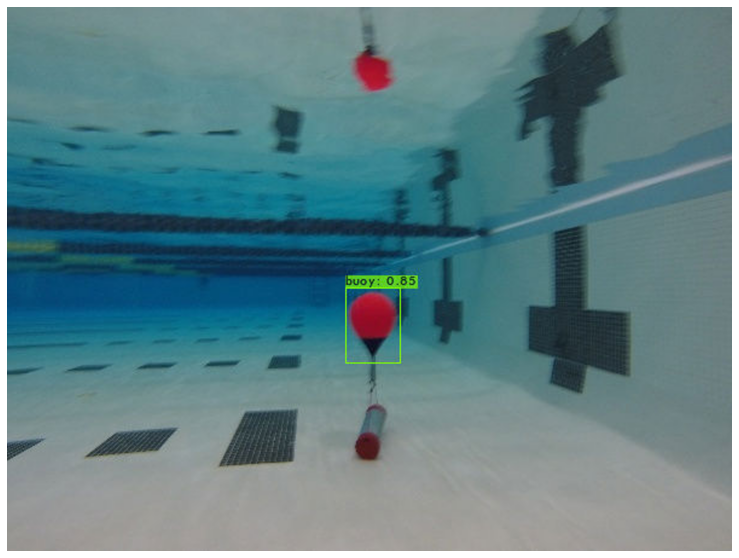

In [25]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_last.weights /mydrive/YOLOv3/test_images/131.jpg -thresh 0.3

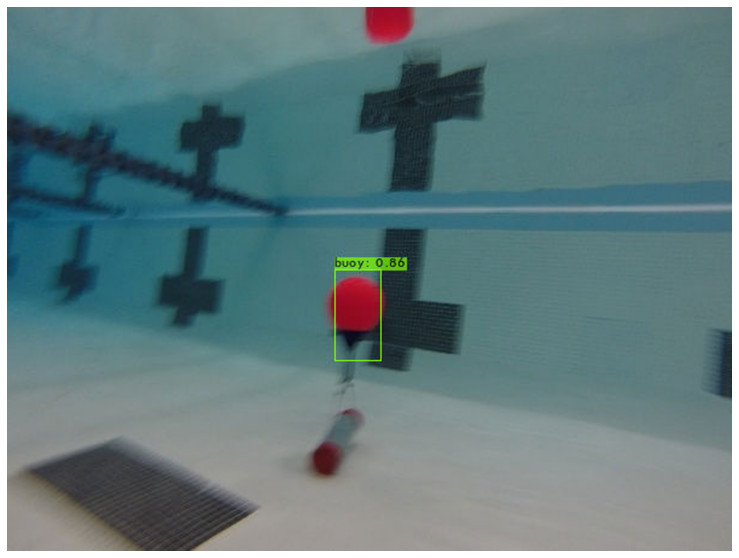

In [27]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_last.weights /mydrive/YOLOv3/test_images/156.jpg -thresh 0.3

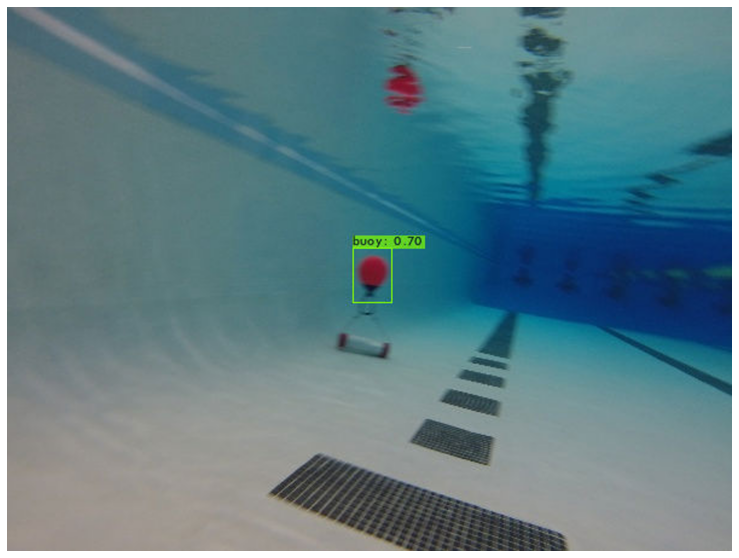

In [29]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/YOLOv3/training/yolov3-custom_last.weights /mydrive/YOLOv3/test_images/522.jpg -thresh 0.3

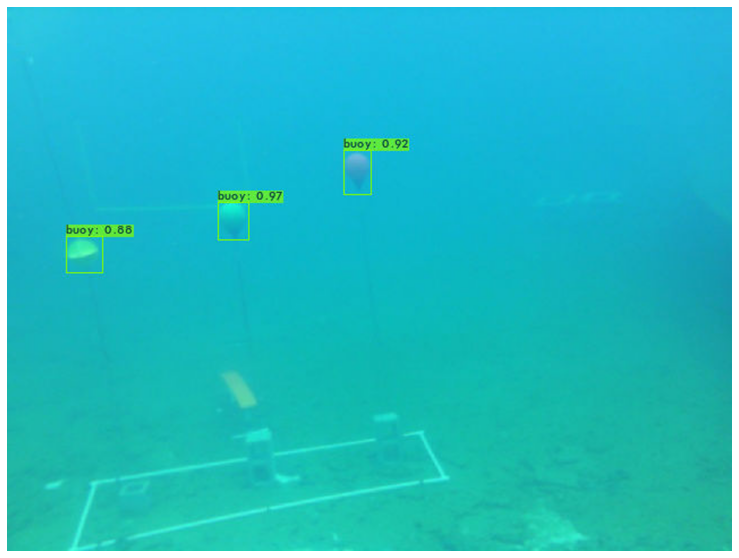

In [31]:
imShow('predictions.jpg')